In [19]:
import pyfits 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import astropy 
from astropy import cosmology 
import math as mt


In [20]:
f = open('/Users/jennifercooper/Documents/Gal_Ev/D4000_size/field_size.txt', 'r')
lines = f.readlines()[1:]
f.close()

f_re_er = [] 
f_re    = []
f_n     = []
f_n_er  = []
f_z     = []
f_dk    = []
f_lmass = []
f_flag  = []

for line in lines: 
    a = line.split()
    f_z.append(float(a[16]))
    f_re.append(float(a[6]))
    f_re_er.append(float(a[7]))
    f_n.append(float(a[8]))
    f_n_er.append(float(a[9]))
    f_dk.append(float(a[32]))
    f_lmass.append(float(a[21]))
    f_flag.append(float(a[36]))
    
f_re    = np.array(f_re)
f_re_er = np.array(f_re_er)
f_n     = np.array(f_n)
f_n_er  = np.array(f_n_er)
f_z     = np.array(f_z)
f_dk    = np.array(f_dk)
f_lmass = np.array(f_lmass)
f_flag  = np.array(f_flag)

f_lmass10=f_lmass*10
print f_lmass10


from astropy.cosmology import WMAP9 as cosmo
#convert from logbase 
f_mass = 10**(f_lmass)
#arsec/arcsec/kpc --> kpc size of radius 
f_re_kpc = f_re/cosmo.arcsec_per_kpc_proper(f_z)
#find the mass in 1 kpc 
#f_mass_kpc = f_mass/f_re_kpc**2
#compute stellar surface mass density 
f_ssmd = f_mass/(mt.pi*2*f_re_kpc**2)




[  96.8   89.1  104.3  102.3   91.3  102.8   97.5   94.7  104.   114.8
  101.4  102.8   96.4   99.2   98.8   98.   100.6  105.8  110.1   92.4
  111.6  100.8  104.3  103.5   96.5  108.7   98.3   93.8  105.9  103.2
   99.5   98.6   95.   100.    98.8   93.5   97.3]


In [21]:
c = open('/Users/jennifercooper/Documents/Gal_Ev/D4000_size/irc0218_size.txt', 'r')
lines = c.readlines()[1:]
c.close()

c_re_er = [] 
c_re    = []
c_n     = []
c_n_er  = []
c_z     = []
c_dk    = []
c_lmass = []
c_flag  = [] 

for line in lines: 
    a = line.split()
    c_z.append(float(a[25]))
    c_re.append(float(a[6]))
    c_re_er.append(float(a[7]))
    c_n.append(float(a[8]))
    c_n_er.append(float(a[9]))
    c_dk.append(float(a[21]))
    c_lmass.append(float(a[30]))
    c_flag.append(float(a[36]))
    
c_re    = np.array(c_re)
c_re_er = np.array(c_re_er)
c_n     = np.array(c_n)
c_n_er  = np.array(c_n_er)
c_z     = np.array(c_z)
c_dk    = np.array(c_dk)
c_lmass = np.array(c_lmass)
c_flag  = np.array(c_flag)

c_lmass10=c_lmass*10

#convert from logbase 
c_mass = 10**(c_lmass)
#arsec/arcsec/kpc --> kpc size of radius 
c_re_kpc = c_re/cosmo.arcsec_per_kpc_proper(c_z)
#find the mass in re
#c_mass_kpc = c_mass/c_re_kpc**2
#compute stellar surface mass density 
c_ssmd = c_mass/(mt.pi*2*c_re_kpc**2)

print c_lmass



[ 10.31  10.29   9.5   10.89   9.4    9.64  10.81  10.81  10.83  10.22
   9.94  10.89  11.29   8.88  10.31  11.37  10.25  10.04   9.47  10.76
   9.27  10.63   9.63   9.84  11.05]


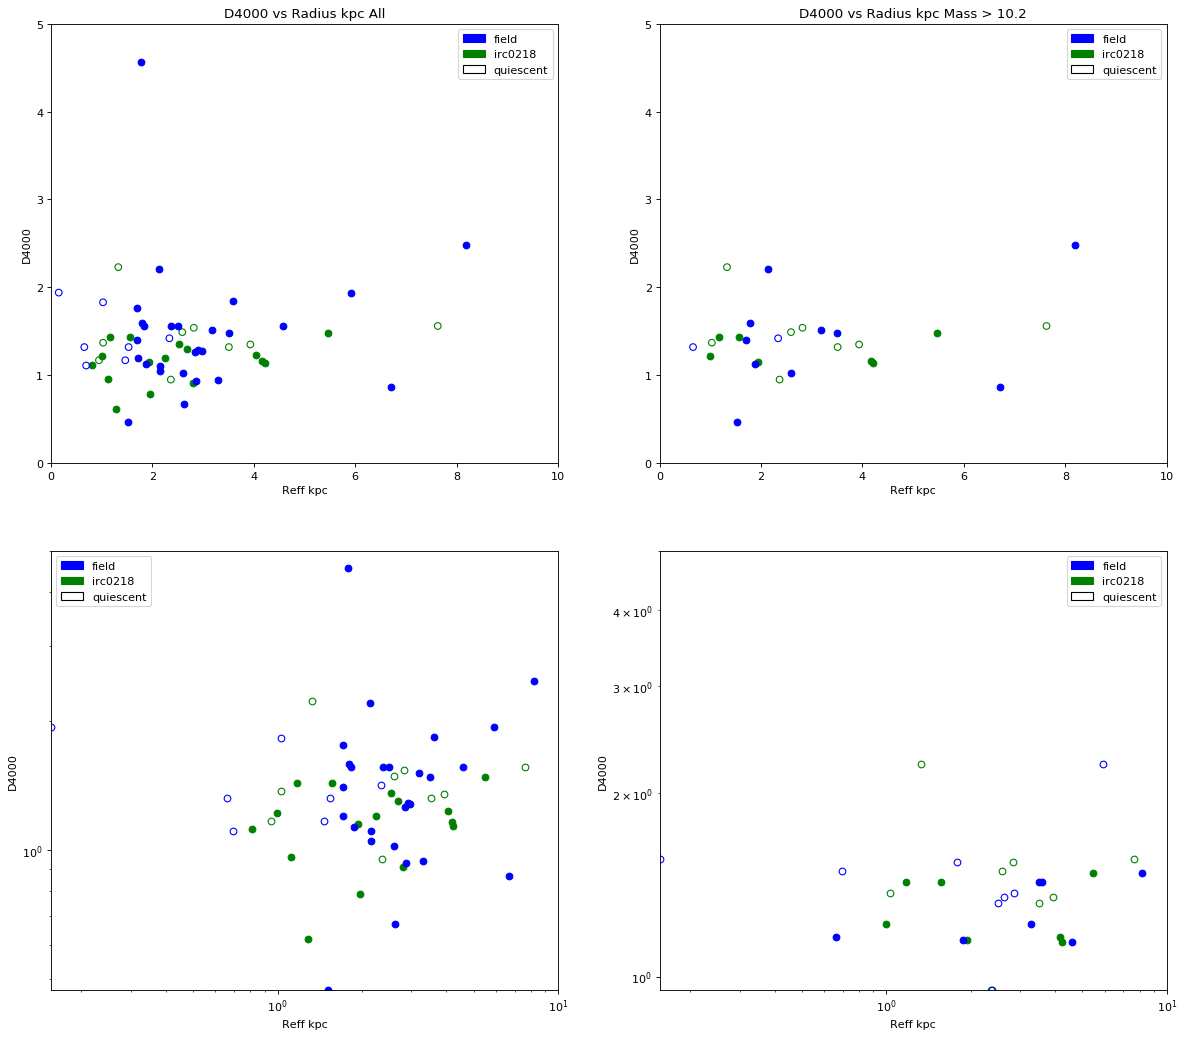

In [23]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.scatter(c_re_kpc[np.where(c_flag<0.9)],c_dk[np.where(c_flag<0.9)], color='green', facecolor='none')
plt.scatter(c_re_kpc[np.where(c_flag>0.9)],c_dk[np.where(c_flag>0.9)], color='green')
plt.scatter(f_re_kpc[np.where(f_flag<0.9)],f_dk[np.where(f_flag<0.9)], color = 'blue', facecolor='none')
plt.scatter(f_re_kpc[np.where(f_flag>0.9)],f_dk[np.where(f_flag>0.9)], color = 'blue')
plt.xlabel('Reff kpc')
plt.ylabel('D4000')
plt.xlim(0,10)
plt.ylim(0,5)
blue_patch = mpatches.Patch(color='blue', label='field')
green_patch = mpatches.Patch(color='green', label = 'irc0218')
black_patch = mpatches.Patch(color='black', label='quiescent', fill=False)
plt.legend(handles=[blue_patch,green_patch,black_patch])
plt.title('D4000 vs Radius kpc All')
#plt.show()

plt.subplot(2,2,2)
plt.scatter(c_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))],c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], color='green', facecolor='none')
plt.scatter(c_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))],c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], color='green')
plt.scatter(f_re_kpc[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))],f_dk[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], color = 'blue', facecolor='none')
plt.scatter(f_re_kpc[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))],f_dk[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], color = 'blue')
plt.xlabel('Reff kpc')
plt.ylabel('D4000')
plt.xlim(0,10)
plt.ylim(0,5)
blue_patch = mpatches.Patch(color='blue', label='field')
green_patch = mpatches.Patch(color='green', label = 'irc0218')
black_patch = mpatches.Patch(color='black', label='quiescent', fill=False)
plt.legend(handles=[blue_patch,green_patch,black_patch])
plt.title('D4000 vs Radius kpc Mass > 10.2')
#plt.show()

plt.subplot(2,2,3)
plt.loglog(c_re_kpc[np.where(c_flag<0.9)],c_dk[np.where(c_flag<0.9)], 'go', mfc='none')
plt.loglog(c_re_kpc[np.where(c_flag>0.9)],c_dk[np.where(c_flag>0.9)], 'go')
plt.loglog(f_re_kpc[np.where(f_flag<0.9)],f_dk[np.where(f_flag<0.9)], 'bo', mfc='none')
plt.loglog(f_re_kpc[np.where(f_flag>0.9)],f_dk[np.where(f_flag>0.9)], 'bo')
plt.xlabel('Reff kpc')
plt.ylabel('D4000')
plt.xlim(0,10)
plt.ylim(0,5)
blue_patch = mpatches.Patch(color='blue', label='field')
green_patch = mpatches.Patch(color='green', label = 'irc0218')
black_patch = mpatches.Patch(color='black', label='quiescent', fill=False)
plt.legend(handles=[blue_patch,green_patch,black_patch])

plt.subplot(2,2,4)
plt.loglog(c_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))],c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], 'go', mfc='none')
plt.loglog(c_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))],c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], 'go')
plt.loglog(f_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))],c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], 'bo', mfc='none')
plt.loglog(f_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))],c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], 'bo')
plt.xlabel('Reff kpc')
plt.ylabel('D4000')
plt.xlim(0,10)
plt.ylim(0,5)
blue_patch = mpatches.Patch(color='blue', label='field')
green_patch = mpatches.Patch(color='green', label = 'irc0218')
black_patch = mpatches.Patch(color='black', label='quiescent', fill=False)
plt.legend(handles=[blue_patch,green_patch,black_patch])
plt.show()

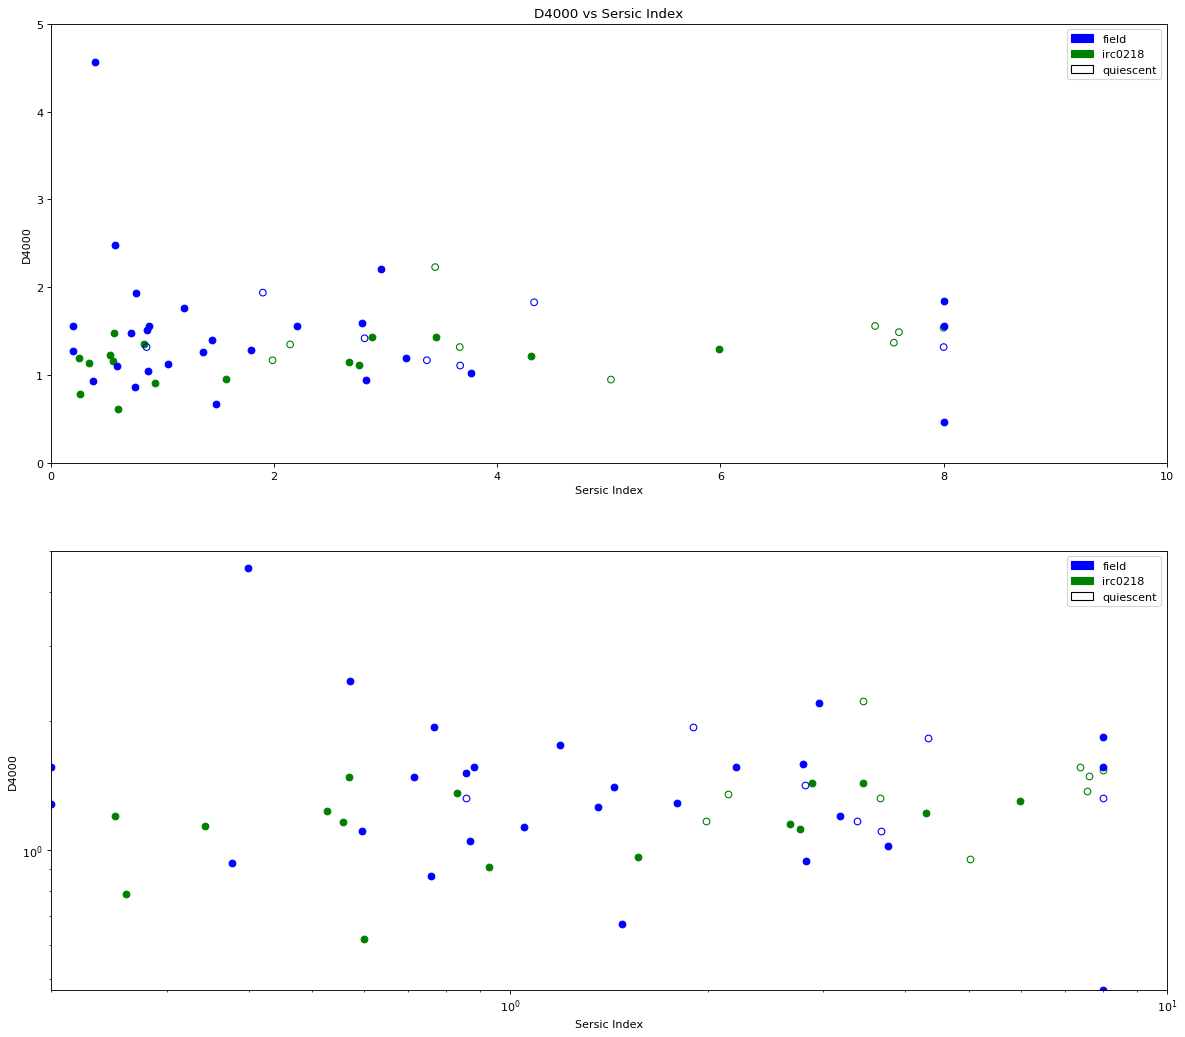

In [39]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.scatter(c_n[np.where(c_flag<0.9)],c_dk[np.where(c_flag<0.9)], color='green', facecolor='none')
plt.scatter(c_n[np.where(c_flag>0.9)],c_dk[np.where(c_flag>0.9)], color='green')
plt.scatter(f_n[np.where(f_flag<0.9)],f_dk[np.where(f_flag<0.9)], color = 'blue', facecolor='none')
plt.scatter(f_n[np.where(f_flag>0.9)],f_dk[np.where(f_flag>0.9)], color = 'blue')


plt.xlabel('Sersic Index')
plt.ylabel('D4000')
plt.xlim(0,10)
plt.ylim(0,5)
blue_patch = mpatches.Patch(color='blue', label='field')
green_patch = mpatches.Patch(color='green', label = 'irc0218')
black_patch = mpatches.Patch(color='black', label='quiescent', fill=False)
plt.legend(handles=[blue_patch,green_patch,black_patch])
plt.title('D4000 vs Sersic Index')

plt.subplot(2,1,2)
plt.loglog(c_n[np.where(c_flag<0.9)], c_dk[np.where(c_flag<0.9)], 'go', mfc='none')
plt.loglog(c_n[np.where(c_flag>0.9)], c_dk[np.where(c_flag>0.9)], 'go')
plt.loglog(f_n[np.where(f_flag<0.9)], f_dk[np.where(f_flag<0.9)], 'bo', mfc='none')
plt.loglog(f_n[np.where(f_flag>0.9)], f_dk[np.where(f_flag>0.9)], 'bo')
plt.xlabel('Sersic Index')
plt.ylabel('D4000')
plt.xlim(0,10)
plt.ylim(0,5)
blue_patch = mpatches.Patch(color='blue', label='field')
green_patch = mpatches.Patch(color='green', label = 'irc0218')
black_patch = mpatches.Patch(color='black', label='quiescent', fill=False)
plt.legend(handles=[blue_patch,green_patch,black_patch])
plt.show()

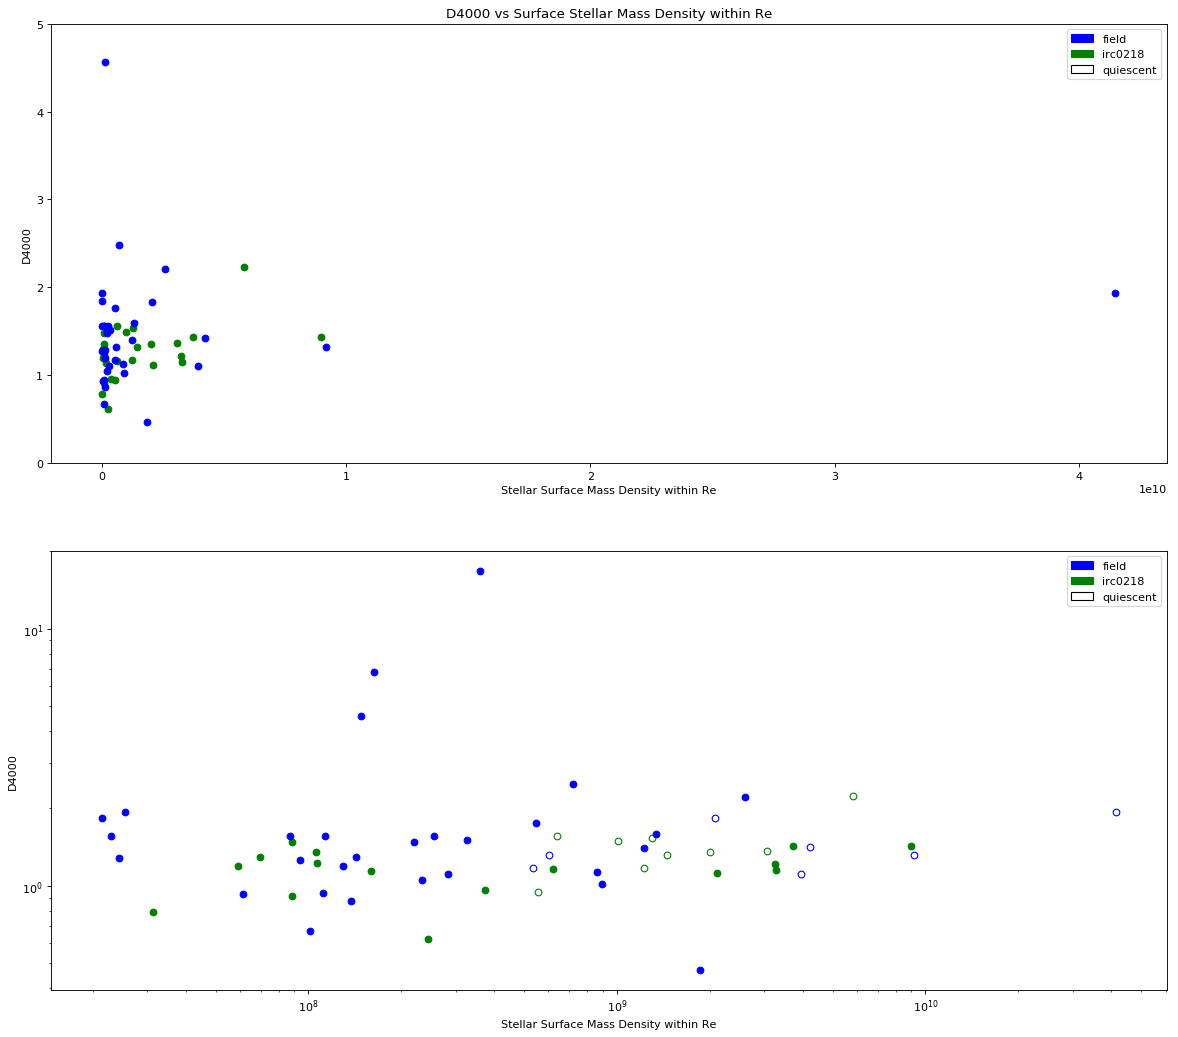

In [36]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.scatter(c_ssmd,c_dk, color='green')
plt.scatter(f_ssmd,f_dk, color = 'blue')
plt.xlabel('Stellar Surface Mass Density within Re')
plt.ylabel('D4000')
#plt.xlim(10e6,10e11)
plt.ylim(0,5)
blue_patch = mpatches.Patch(color='blue', label='field')
green_patch = mpatches.Patch(color='green', label = 'irc0218')
black_patch = mpatches.Patch(color='black', label='quiescent', fill=False)
plt.legend(handles=[blue_patch,green_patch,black_patch])
plt.title('D4000 vs Surface Stellar Mass Density within Re')
#plt.show()

plt.subplot(2,1,2)
plt.loglog(c_ssmd[np.where(c_flag<0.9)],c_dk[np.where(c_flag<0.9)], 'go', mfc='none')
plt.loglog(c_ssmd[np.where(c_flag>0.9)],c_dk[np.where(c_flag>0.9)], 'go')
plt.loglog(f_ssmd[np.where(f_flag<0.9)],f_dk[np.where(f_flag<0.9)], 'bo', mfc='none')
plt.loglog(f_ssmd[np.where(f_flag>0.9)],f_dk[np.where(f_flag>0.9)], 'bo')
plt.xlabel('Stellar Surface Mass Density within Re')
plt.ylabel('D4000')
blue_patch = mpatches.Patch(color='blue', label='field')
green_patch = mpatches.Patch(color='green', label = 'irc0218')
black_patch = mpatches.Patch(color='black', label='quiescent', fill=False)
plt.legend(handles=[blue_patch,green_patch,black_patch])
plt.show()